Plotting a timeline panel for Figure 1

### Setup

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
data_path = '../data/'
metadata_path = '../data/metadata/'
plot_path = '../figures/'

### Read data

##### Participants

In [3]:
participant_data = pd.read_csv(os.path.join(metadata_path, 'participants.tsv'), sep='\t', index_col=0)
participant_data['Date of Birth'] = pd.to_datetime(participant_data['Date of Birth'])
participant_data.head()

,Subject ID,Date of Birth,Gender,Birth Height (cm),Birth Height Percentile,Birth Weight (kg),Birth Weight Percentile,Birth Head Cir. (cm),Birth Head Cir. Percentile,Race #1,...,Amphibian/Reptile,Bird,Other,Live on Farm?,Smokers at home?,Any medical conditions/signs/symptoms prior to study?,Condition #1,Past or Current?,Condition #2,Past or Current?.1
PrimaryKey,,,,,,,,,,,,,,,,,,,,,
Baby101,101,2018-01-24,Male,Not Documented,Not Documented,3.646,Not Documented,Not Documented,Not Documented,White/Caucasian,...,NaN,NaN,NaN,No,No,Yes,Nevus,Current,NaN,NaN
Baby102,102,2018-02-20,Male,50,50,3.35,37,34.5,25,Arab/North African,...,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN
Baby103,103,2018-02-21,Female,52,84,3.41,51,36.5,85,White/Caucasian,...,NaN,NaN,NaN,No,No,Yes,broken collar bone,Current,NaN,NaN
Baby104,104,2018-03-12,Female,55.2,98,3.615,61,35.6,64,White/Caucasian,...,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN
Baby105,105,2018-03-30,Female,50.8,72.31,3.97,89.09,34,32.73,White/Caucasian,...,NaN,NaN,pigs,No,No,Yes,Jaundice,Current,NaN,NaN


##### Visits

In [4]:
visit_data = pd.read_csv(os.path.join(metadata_path, 'visits.tsv'), sep='\t', index_col=0)
visit_data.head()

,BabyN,Subject,Type of Visit,Visit #,Visit Date,Age (Days),Height (cm),Height Percentile,Weight (kg),Weight Percentile,...,Today HiB,Today Prevnar 13,Today Hepatitis B,Today MMR,Today Varicella,Today Hepatitis A,Today Influenza (Flu),Today Rotavirus,Today Other,Comment
PrimaryKey,,,,,,,,,,,,,,,,,,,,,
Baby101_V3,Baby101,101,"Enrollment, 2wk",V3,2018-02-16,23,55,65,4.423,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baby102_V1,Baby102,102,"Enrollment, <1wk",V1,2018-02-26,6,50.8,46,3.23,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baby103_V1,Baby103,103,"Enrollment, <1wk",V1,2018-02-26,5,52.1,82,3.416,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baby104_V2,Baby104,104,"Enrollment, 1wk",V2,2018-03-23,11,Not Documented,Not Documented,3.812,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baby105_V1,Baby105,105,"Enrollment, <1wk",V1,2018-04-02,3,51.4,75.48,3.884,81.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Antibiotics

In [5]:
abx_usage = pd.read_csv(os.path.join(metadata_path, 'antibiotic_usage.tsv'), sep='\t', index_col=0)

# Add age at start, calculated from start data and date of birth
abx_usage['Duration_(days)'] = pd.to_numeric(abx_usage['Duration_(days)'], errors='coerce')
abx_usage['Start_Date'] = pd.to_datetime(abx_usage['Start_Date'], errors='coerce')
abx_usage['Age_at_start'] = [(row['Start_Date'] - participant_data.loc[row['BabyN'], 'Date of Birth']).days for i, row in abx_usage.iterrows()]
abx_usage.head()

,BabyN,AntibioticN,Name,Reason,Start_Date,End_Date,Duration_(days),Route,Age_at_start
PrimaryKey,,,,,,,,,
Baby134_Antibiotic1,Baby134,1,piperacillin/ tazobactam,R/O sepsis,2018-11-26,2018-11-28,2.0,IV,4.0
Baby134_Antibiotic2,Baby134,2,ampicillin,R/O sepsis,2018-11-26,2018-11-27,1.0,IV,4.0
Baby134_Antibiotic3,Baby134,3,gentamicin,R/O sepsis,2018-11-26,2018-11-27,1.0,IV,4.0
Baby134_Antibiotic4,Baby134,4,vancomycin,R/O sepsis,2018-11-26,2018-11-27,1.0,IV,4.0
Baby235_Antibiotic1,Baby235,1,unknown anitbiotic(s),"R/O sepsis, later confirmed neg.",2018-06-19,Not Documented,NaN,NaN,6.0


In [6]:
# filter for oral abx only
abx_usage_oral = abx_usage[abx_usage.Route=='oral']
# filter out instances without known timings
abx_usage_oral.Age_at_start.isnull().sum() # only one of these
abx_usage_oral = abx_usage_oral[~abx_usage_oral.Age_at_start.isnull()]
abx_usage_oral

,BabyN,AntibioticN,Name,Reason,Start_Date,End_Date,Duration_(days),Route,Age_at_start
PrimaryKey,,,,,,,,,
Baby103_Antibiotic1,Baby103,1,amoxicillin,Pneumonia,2020-01-07,2020-01-17,10.0,oral,685.0
Baby106_Antibiotic2,Baby106,2,amoxicillin,AOM,2019-01-16,2019-01-26,10.0,oral,295.0
Baby107_Antibiotic2,Baby107,2,amoxicillin,OME,2018-12-12,2018-12-22,10.0,oral,254.0
Baby107_Antibiotic3,Baby107,3,amoxicillin,bronchiolitis,2019-01-04,2019-01-11,7.0,oral,277.0
Baby107_Antibiotic4,Baby107,4,cefdinir,"bronchilitis, pneumonia",2019-01-11,2019-01-14,3.0,oral,284.0
...,...,...,...,...,...,...,...,...,...
Baby259_Antibiotic1,Baby259,1,amoxicillin,"AOM, URI",2019-04-21,2019-05-01,10.0,oral,177.0
Baby261_Antibiotic1,Baby261,1,amoxicillin,Bronchiolitis,2019-04-08,2019-04-13,5.0,oral,158.0
Baby261_Antibiotic2,Baby261,2,amoxicillin clavulanate,pyoderma,2019-10-21,2019-10-28,7.0,oral,354.0


##### Samples

In [7]:
stool_samples = pd.read_csv(os.path.join(metadata_path, 'stool', 'stool_metadata.csv'))
print(stool_samples.shape)
stool_samples.head()

(709, 26)


,SampleID,SubmissionType,SampleNumber,SampleIDValidation,DiversigenCheckInSampleName,BoxLocation,SampleType,SampleSource,SequencingType,BabyN,...,VisitCodeTimeEquivalent,VisitCode_or_TimeEquivalent_checked,OutputFileName,Plate,Row,Column,age_at_collection,collection_method,Count,gt_2.5
0,204_V5,Primary in Tube,1,NaN,204_S,"Box 7, A1",Stool,Human Infant,MetaG,204,...,2 months,NaN,204_V5,3,3,8,67.0,Home,3628514,True
1,226_V1,Primary in Tube,2,NaN,NaN,"Box 7, A2",Stool,Human Infant,MetaG,226,...,1-6 days,NaN,226_V1,5,5,2,4.0,Clinic,3363490,True
2,107_V3,Primary in Tube,3,NaN,NaN,"Box 7, A3",Stool,Human Infant,MetaG,107,...,2 weeks,NaN,107_V3,7,3,7,18.0,Home,3350273,True
3,108_V3,Primary in Tube,4,NaN,NaN,"Box 7, A4",Stool,Human Infant,MetaG,108,...,2 weeks,NaN,108_V3,3,1,1,16.0,Home,5095831,True
4,109_V1,Primary in Tube,5,NaN,NaN,"Box 7, A5",Stool,Human Infant,MetaG,109,...,1-6 days,NaN,109_V1,6,6,12,3.0,Home,4963525,True


In [8]:
nasal_samples = pd.read_csv(os.path.join(metadata_path, 'nasal', 'nasal_metadata.csv'))
print(nasal_samples.shape)
nasal_samples.head()

(1008, 23)


,SubmissionType,SampleNumber,SampleID,SampleIDValidation,DiversigenCheckInSampleName,ReplacesLowVolumeSampleID,BoxLocation,SampleType,SampleSource,SequencingType,...,DOB_checked,CollectionDate,CollectionDate_checked,VisitCode,VisitCode_checked,SwabCode,OutputFileName,Plate,Row,Column
0,Primary in Tube,1,103_V5_NS_A1,NaN,NaN,NaN,"Box 1, A1",Nasal Swab,Human Infant,16S,...,NaN,2018-04-27,NaN,V5,NaN,A1,103_V5_NS_A1,4,6,12
1,Primary in Tube,2,106_V5_NS_A1,NaN,NaN,NaN,"Box 1, A3",Nasal Swab,Human Infant,16S,...,NaN,2018-05-29,NaN,V5,NaN,A1,106_V5_NS_A1,8,3,4
2,Primary in Tube,3,107_V2_NS_A1,NaN,NaN,NaN,"Box 1, A4",Nasal Swab,Human Infant,16S,...,NaN,2018-04-09,NaN,V2,NaN,A1,107_V2_NS_A1,11,2,2
3,Primary in Tube,4,107_V3_NS_A1,NaN,107_V8_NS_A1,NaN,"Box 1, A5",Nasal Swab,Human Infant,16S,...,NaN,2018-04-20,NaN,V3,NaN,A1,107_V3_NS_A1,11,2,3
4,Primary in Tube,5,107_V5_NS_A1,NaN,NaN,NaN,"Box 1, A8",Nasal Swab,Human Infant,16S,...,NaN,2018-06-04,NaN,V5,NaN,A1,107_V5_NS_A1,11,2,4


##### Titres

In [9]:
titre_data = pd.read_csv(os.path.join(data_path, 'vaccine_response', 'titers.tsv'), sep='\t', index_col=0)
titre_data.head()

,BabyN,Date,VisitCode,VisitType,Age(Days),Category,CollectionMethod,SampleType,Antigen,Value,Unit,ProtectiveThreshold
PrimaryKey,,,,,,,,,,,,
Baby106_2m_PT,Baby106,2018-05-29,V5,Well Check 02m,63,2m,Heelstick,Serum,PT,5.00,ELU/ml,8.0
Baby110_2m_PT,Baby110,2018-07-09,V5,Well Check 02m,63,2m,Heelstick,Serum,PT,60.00,ELU/ml,8.0
Baby113_2m_PT,Baby113,2018-07-26,V5,Well Check 02m,72,2m,Heelstick,Serum,PT,22.00,ELU/ml,8.0
Baby113_2m_Dip,Baby113,2018-07-26,V5,Well Check 02m,72,2m,Heelstick,Serum,Dip,0.58,IU/ml,0.1
Baby115_2m_PT,Baby115,2018-08-24,V6,Well Check 04m,92,2m,Heelstick,Serum,PT,5.00,ELU/ml,8.0


##### Vaccinations

In [10]:
vaccine_data = pd.read_csv(os.path.join(metadata_path, 'vaccines.tsv'), sep='\t', index_col=0)
vaccine_data.head()

,BabyN,Date of Birth,Visit Date,Age (Days),Vaccine
PrimaryKey,,,,,
101_DTaP_1,101,1/24/18,3/26/18,61,DTaP
102_DTaP_1,102,2/20/18,4/20/18,59,DTaP
102_DTaP_2,102,2/20/18,6/20/18,120,DTaP
103_DTaP_1,103,2/21/18,4/27/18,65,DTaP
103_DTaP_2,103,2/21/18,8/24/18,184,DTaP


### Set up for plot

In [11]:
# figure out the length of the line for each infant
# this is from enrollment visit to last visit
time_in_study = participant_data[['Subject ID']] # start the table
# add enrollment age
enrollment = visit_data[visit_data['Type of Visit'].str.contains('Enrollment')][['Subject','Age (Days)']].rename(columns={'Subject':'Subject ID'})
time_in_study = time_in_study.merge(enrollment).rename(columns={'Age (Days)':'enrollment_age'})
# add final visit age - loop through each kid, must be a better way though, groupby on visit_data probably
for i,row in time_in_study.iterrows():
    sid = row['Subject ID']
    maxage = visit_data[visit_data.Subject==sid]['Age (Days)'].max()
    time_in_study.loc[i, 'final_visit_age'] = maxage
    # also add final sample age - might be older? 
    # stool 
    cd = pd.to_datetime(stool_samples[stool_samples['BabyN']==sid].CollectionDate)
    bd = pd.to_datetime(stool_samples[stool_samples['BabyN']==sid].DOB)
    maxage_stool = (cd-bd).dt.days.max()
    # nasal
    cd = pd.to_datetime(nasal_samples[nasal_samples['BabyN']==sid].CollectionDate)
    bd = pd.to_datetime(nasal_samples[nasal_samples['BabyN']==sid].DOB)
    maxage_nasal = (cd-bd).dt.days.max()
    time_in_study.loc[i,'final_sample_age'] = np.nanmax([maxage_stool, maxage_nasal])
    # add final final (!) age
    time_in_study.loc[i,'final_age'] = np.nanmax([maxage, maxage_stool, maxage_nasal])

# sort kids by final age
time_in_study.sort_values('final_age', inplace=True, ascending=False)
# add y-position for this kid for plotting
time_in_study['y_pos'] = range(time_in_study.shape[0])
time_in_study

,Subject ID,enrollment_age,final_visit_age,final_sample_age,final_age,y_pos
61,226,4,881.0,881.0,881.0,0
58,223,6,867.0,867.0,867.0,1
2,103,5,804.0,804.0,804.0,2
45,210,11,802.0,802.0,802.0,3
11,112,15,802.0,802.0,802.0,4
...,...,...,...,...,...,...
0,101,23,61.0,61.0,61.0,96
48,213,6,53.0,55.0,55.0,97
3,104,11,16.0,11.0,16.0,98
77,242,12,12.0,12.0,12.0,99


### Plot

In [12]:
# marker properties
titer_shape = '1'
titer_colour = 'k'
titer_size = 70 # do not understand this marker size scale

vax_shape = '|'
vax_colour = 'k'

stool_shape = 'o'
stool_colour = 'tab:blue'
stool_alpha = 0.5

nasal_shape = 'o'
nasal_colour = 'tab:red'
nasal_alpha = 0.5

abx_colour = 'tab:green'
abx_width = 3

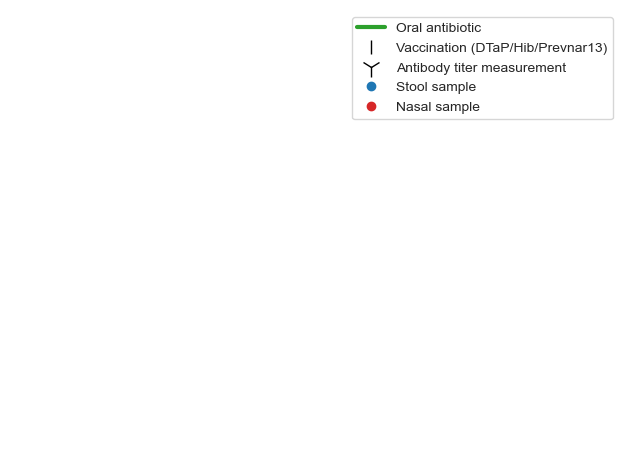

In [13]:
# make a legend in a separate file
legend_elements = [mpl.lines.Line2D([0],[0], 
                                    color=abx_colour, lw=abx_width,
                                    label='Oral antibiotic'),
                   mpl.lines.Line2D([0],[0],lw=0,
                                    color=vax_colour, marker=vax_shape, ms=10,
                                    label='Vaccination (DTaP/Hib/Prevnar13)'),
                   mpl.lines.Line2D([0],[0],lw=0, 
                                    color=titer_colour, marker=titer_shape, ms=15, 
                                    label='Antibody titer measurement'),
                   mpl.lines.Line2D([0],[0],lw=0,
                                    color=stool_colour, marker=stool_shape,
                                    label='Stool sample'),
                   mpl.lines.Line2D([0],[0],lw=0,
                                    color=nasal_colour, marker=nasal_shape,
                                    label='Nasal sample'),
                  ]

fig, ax = plt.subplots()
ax.legend(handles=legend_elements)
ax.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'F1_timeline_legend.pdf'), dpi=600)

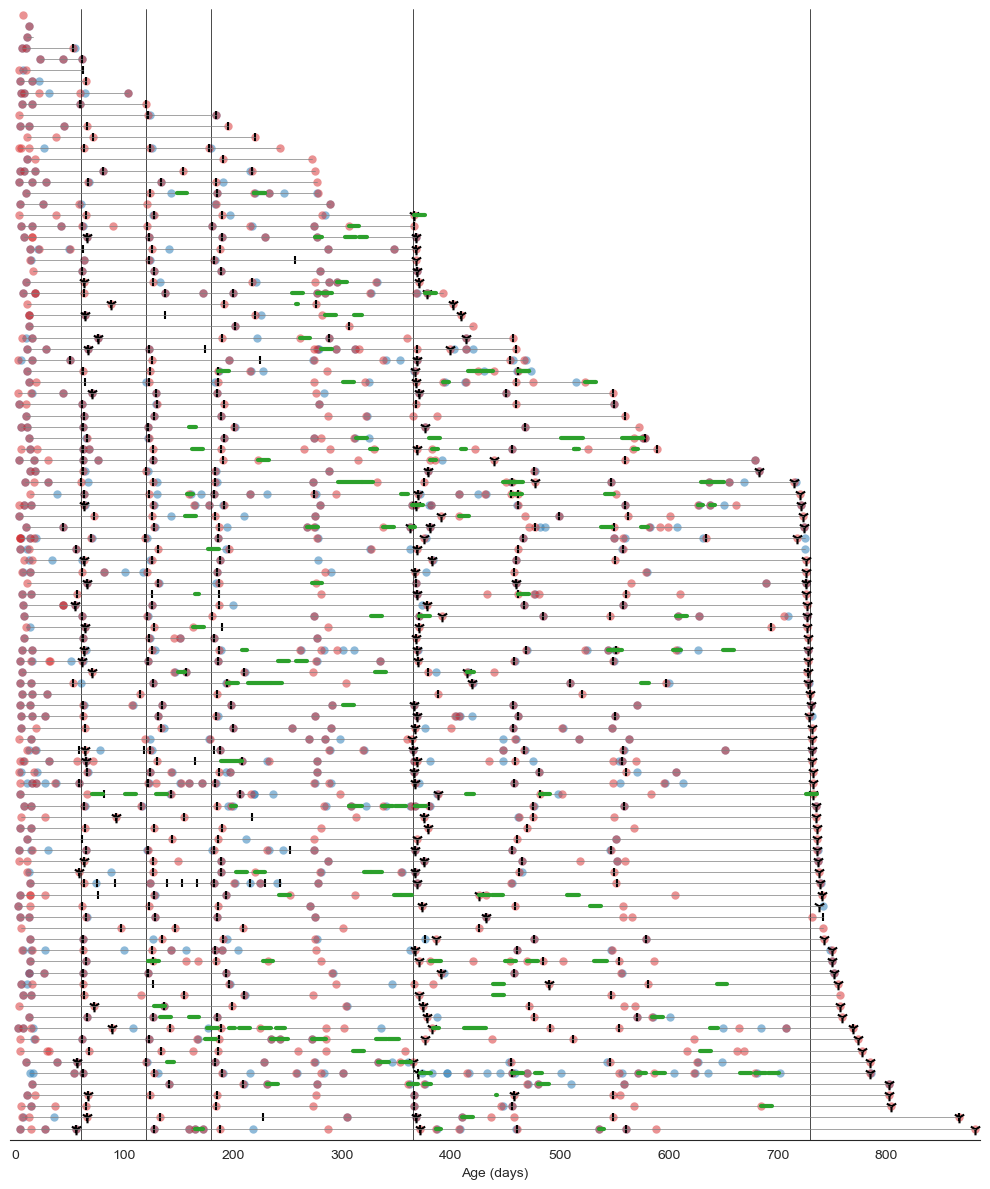

In [14]:
# actual timeline plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
# add vertical lines for 2m, 4m, 6m, 1 year
[ax.axvline(d, color='k', lw=0.5) for d in [60, 120, 180, 365, 365*2]]
# add lines for each kid -- from time_in_study
for index,row in time_in_study.iterrows():
    ax.plot([row.enrollment_age,row.final_age],[row.y_pos,row.y_pos],
            color='tab:grey', lw=0.5)
# add where oral abx was taken
for index, row in time_in_study.iterrows():
    temp = abx_usage_oral[abx_usage_oral.BabyN=='Baby'+str(int(row['Subject ID']))]
    for abxi, abxrow in temp.iterrows():
        # draw a bar for each of these
        ax.plot([abxrow.Age_at_start, abxrow.Age_at_start+abxrow['Duration_(days)']],
                [row.y_pos,row.y_pos],
                color=abx_colour,
                lw=abx_width)
# add stool samples
for index, row in time_in_study.iterrows():
    temp = stool_samples[stool_samples.BabyN==row['Subject ID']]
    if temp.shape[0] >= 1:
        cd = pd.to_datetime(temp.CollectionDate)
        bd = pd.to_datetime(temp.DOB)
        xtp = (cd-bd).dt.days
        ax.scatter(xtp, [row.y_pos]*len(xtp),
                   color=stool_colour,
                   marker=stool_shape,
                   alpha=nasal_alpha,
                   lw=0)
# add nasal samples
for index, row in time_in_study.iterrows():
    temp = nasal_samples[nasal_samples.BabyN==row['Subject ID']]
    if temp.shape[0] >= 1:
        cd = pd.to_datetime(temp.CollectionDate)
        bd = pd.to_datetime(temp.DOB)
        xtp = (cd-bd).dt.days
        ax.scatter(xtp, [row.y_pos]*len(xtp),
                   color=nasal_colour,
                   marker=nasal_shape,
                   alpha=nasal_alpha,
                   lw=0)
# add titer measurements
for index,row in time_in_study.iterrows():
    temp = titre_data[titre_data.BabyN=='Baby'+str(int(row['Subject ID']))]
    if temp.shape[0] >= 1:
        xtp = temp['Age(Days)'].unique() # days that there are titre measurements at
        ax.scatter(xtp, [row.y_pos]*len(xtp),
                   color=titer_colour,
                   marker=titer_shape,
                   s=titer_size)
# add vaccinations
for index, row in time_in_study.iterrows():
    temp = vaccine_data[vaccine_data.BabyN==row['Subject ID']]
    # restrict to only the vaccines we're interested in 
    temp = temp[temp.Vaccine.isin(['DTaP','HiB','Prevnar 13'])]
    if temp.shape[0] >= 1:
        xtp = temp['Age (Days)'].unique()
        ax.scatter(xtp, [row.y_pos]*len(xtp),
                   color=vax_colour,
                   marker=vax_shape)
# tidy axes
ax.set_xlim(-5,time_in_study.final_age.max()+5)
ax.set_ylim(-1,time_in_study.y_pos.max()+0.5)
ax.set_yticks([])
[ax.spines[loc].set_visible(False) for loc in ['left','right','top']]
ax.set_xlabel('Age (days)')
# save figure
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'F1_timeline.pdf'), dpi=600)